In [16]:
import os, sys, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
path = os.getcwd()

# walk through the directory
def walk_dir(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.json'):
                yield file

# read json file
def read_json(file):
    with open(file, 'r') as f:
        data = json.load(f)
    return data

# find number index
def find_index(l: list[int], n: int) -> int:
    for i, v in enumerate(l):
        if v == n:
            return i
    return -1

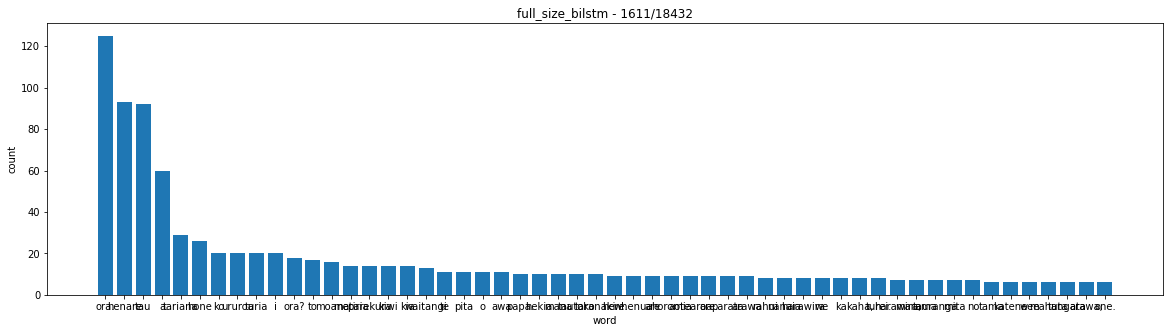

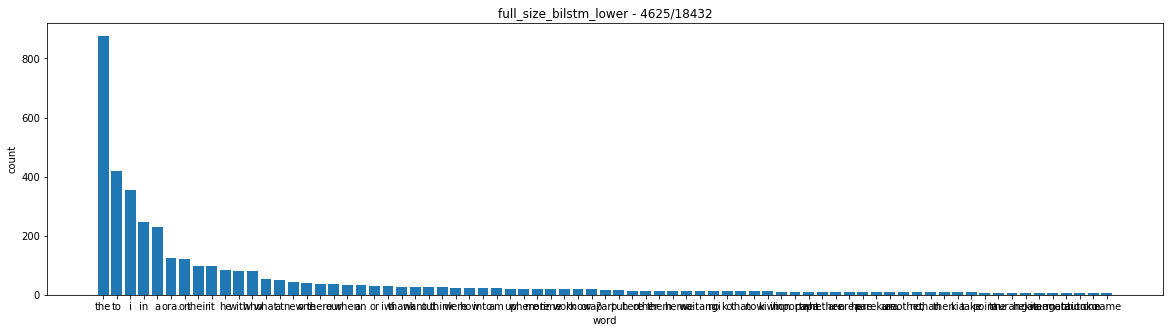

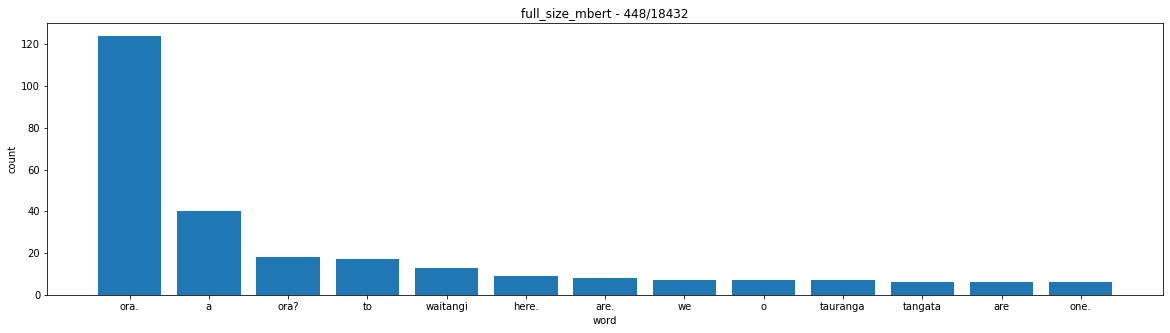

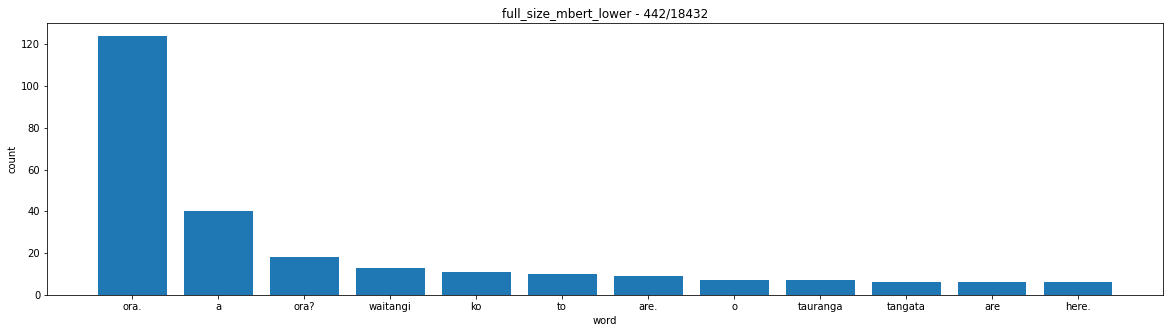

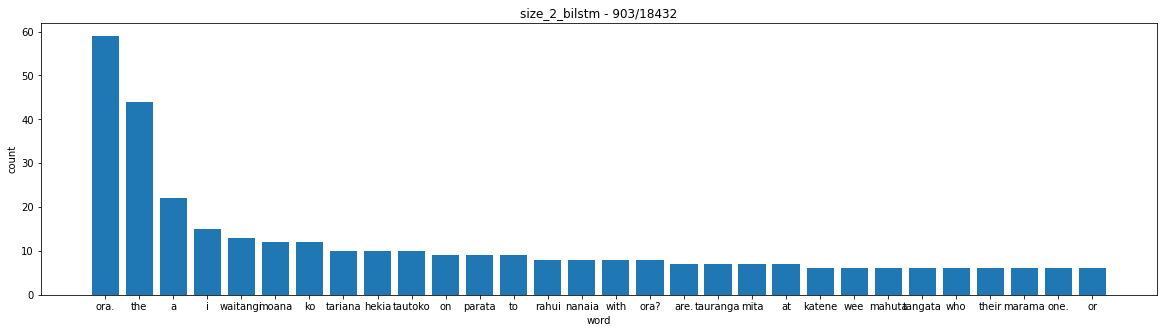

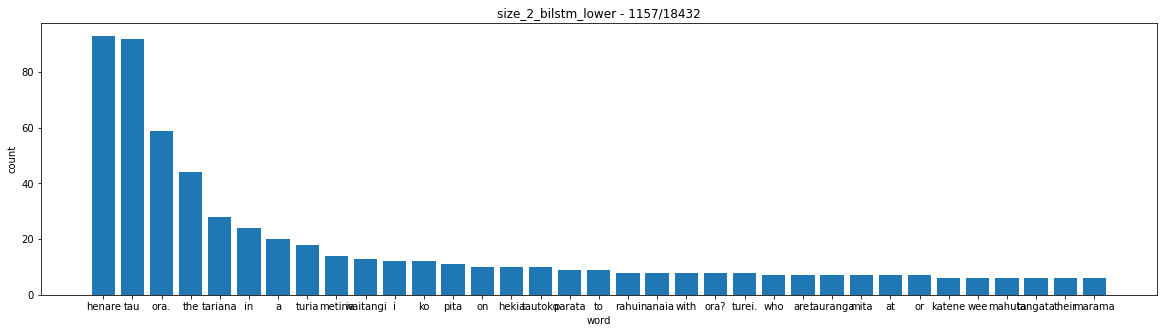

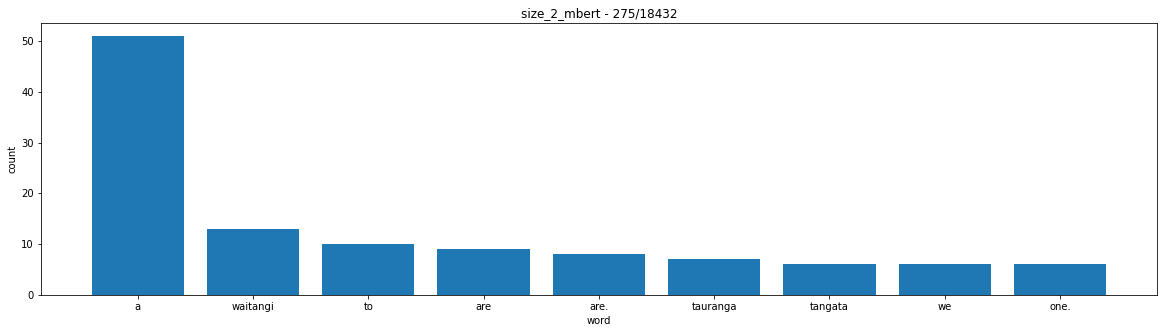

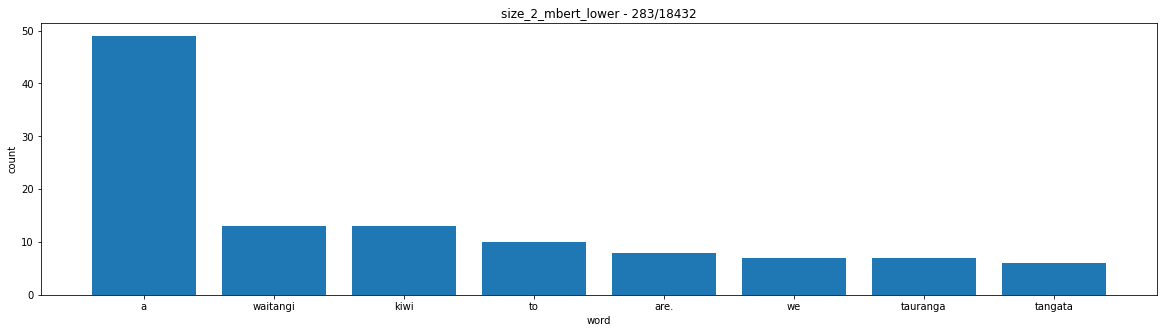

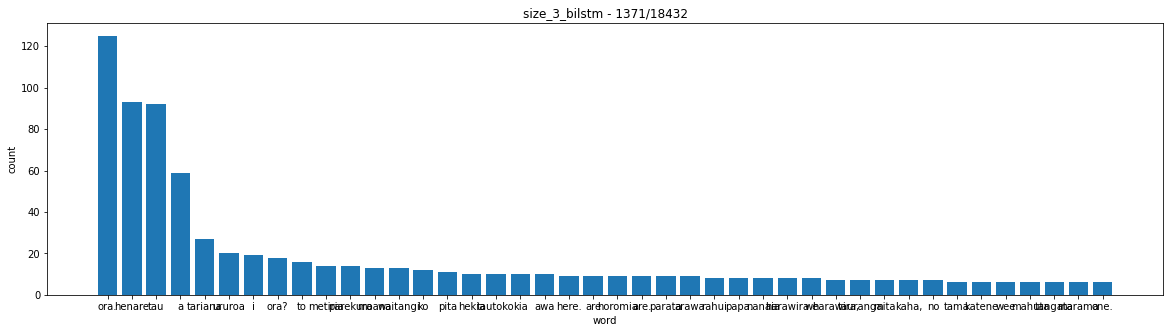

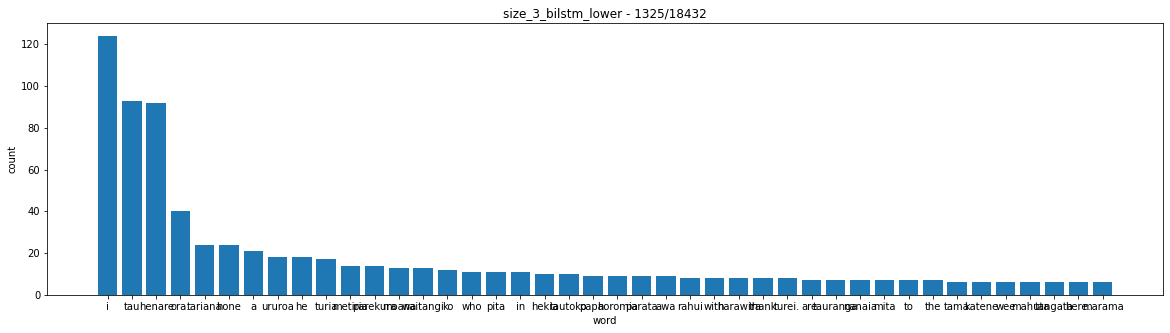

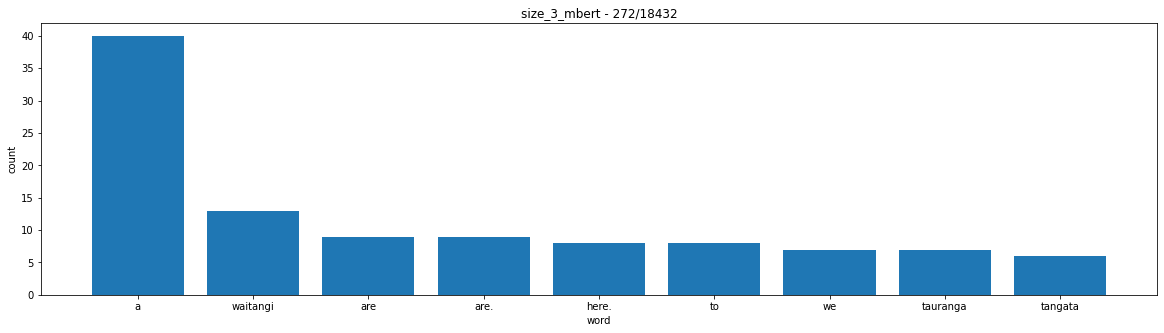

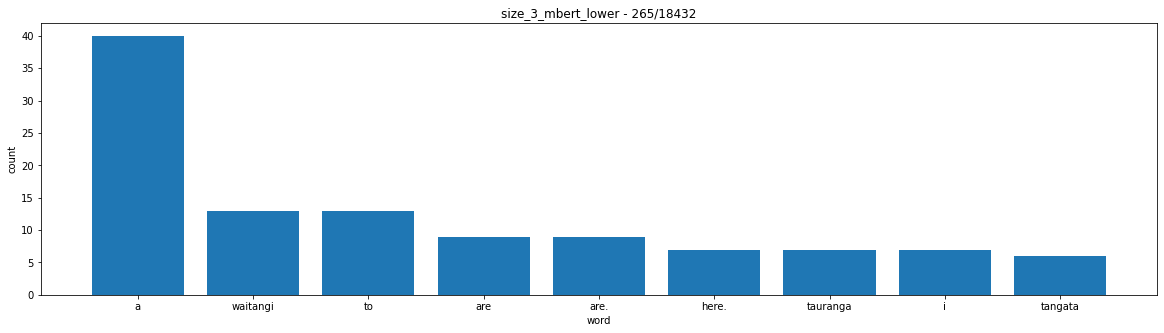

In [21]:
all_result_dict = {file.split('_err')[0]:read_json(file) for file in walk_dir(path)}

count_to_filter = 5

for key in all_result_dict:
    model_name = key
    result_dict = all_result_dict[key]
    for key in result_dict:
        predict_result = key
        word_error_dict = result_dict[key]

        # sort the word error dict by value in descending order
        word_error_dict = dict(sorted(word_error_dict.items(), key=lambda item: item[1], reverse=True))

        error_word_list = list(word_error_dict.keys())
        error_word_count_list = list(word_error_dict.values())

        c_index = find_index(error_word_count_list, count_to_filter)


        plt.figure(figsize=(20, 5))
        plt.title(model_name + ' - ' + predict_result)
        plt.xlabel('word')
        plt.ylabel('count')
        plt.bar(error_word_list[:c_index], error_word_count_list[:c_index])
        plt.show()
        break